In [27]:
from glossary_eval import get_sr2terms
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import os
import csv
from collections import defaultdict
import tqdm
import numpy as np

In [28]:
ROOT = '/data0/lucy/ingroup_lang/'
LOG_DIR = ROOT + 'logs/' 
SENSE_PMI_DIR = LOG_DIR + 'finetuned_sense_pmi/'
TYPE_PMI_DIR = LOG_DIR + 'pmi/'

In [29]:
sr2terms = get_sr2terms()

In [30]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(SENSE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['sense'].split('#####')[0]
            score = float(row['pmi'])
            w2score[w].append(score)
        for w in w2score: 
            if w in gloss_terms: 
                gloss_vals.append(max(w2score[w]))
            else: 
                not_gloss_vals.append(max(w2score[w]))

100%|██████████| 474/474 [00:03<00:00, 136.27it/s]


In [31]:
print(ttest_ind(gloss_vals, not_gloss_vals))

Ttest_indResult(statistic=48.21238574797952, pvalue=0.0)


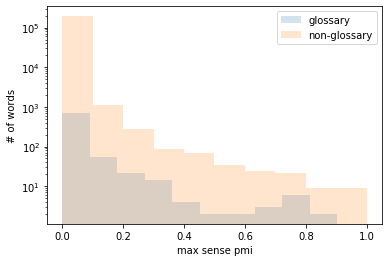

In [32]:
plt.hist(gloss_vals, label="glossary", alpha=0.2)
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2)
plt.yscale('log')
plt.ylabel('# of words')
plt.xlabel('max sense pmi')
plt.legend()

In [33]:
print(np.mean(gloss_vals))
print(np.mean(not_gloss_vals))

0.05504291061365998
0.00962568777329167


In [42]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(TYPE_PMI_DIR))): 
    subreddit = filename.replace('_0.2.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TYPE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['pmi'])
            if w in gloss_terms: 
                gloss_vals.append(score)
            else: 
                not_gloss_vals.append(score)

100%|██████████| 474/474 [00:02<00:00, 208.58it/s]


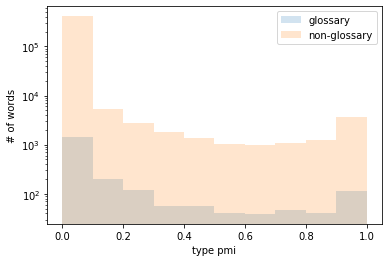

In [45]:
plt.hist(gloss_vals, label="glossary", alpha=0.2)
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2)
plt.yscale('log')
plt.ylabel('# of words')
plt.xlabel('type pmi')
plt.legend()

In [46]:
print(ttest_ind(gloss_vals, not_gloss_vals))

Ttest_indResult(statistic=53.63694201629838, pvalue=0.0)


In [47]:
print(np.mean(gloss_vals))
print(np.mean(not_gloss_vals))

0.16822363961140904
0.027510307871176597
